# Setup the Notebook

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf  # For candlestick charts
from statsmodels.tsa.seasonal import seasonal_decompose
from Scripts.download_data import download_data  # Import your function


# Download & Load the Data

In [2]:
# Download and load data
download_data()
df = pd.read_csv("Data/apple_stock_data.csv", index_col=0, parse_dates=True)

# Convert numeric columns to float
df = df.astype(float)

# Display first few rows
df.head()

✅ Data downloaded and saved at Data\apple_stock_data.csv!


,open,high,low,close,volume
1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-05,84.62,88.37,84.00,88.31,3721500.0


# Line Chart – Closing Price Over Time

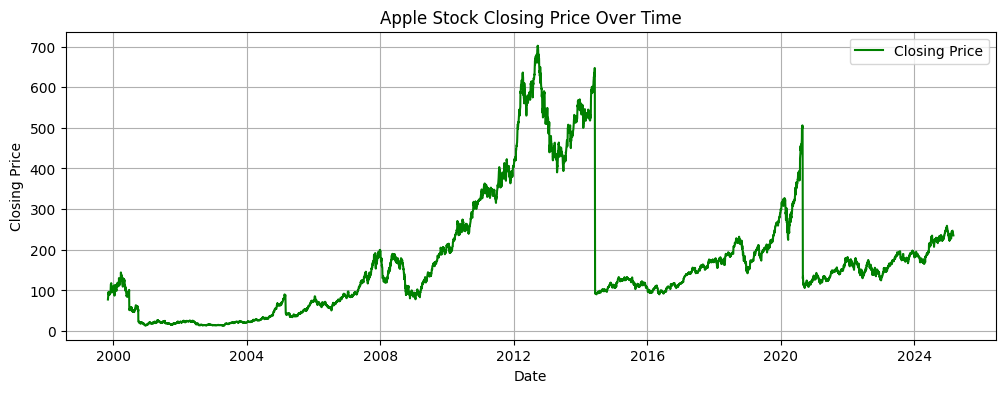

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["close"], label="Closing Price", color="Green")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()

# Candlestick Chart

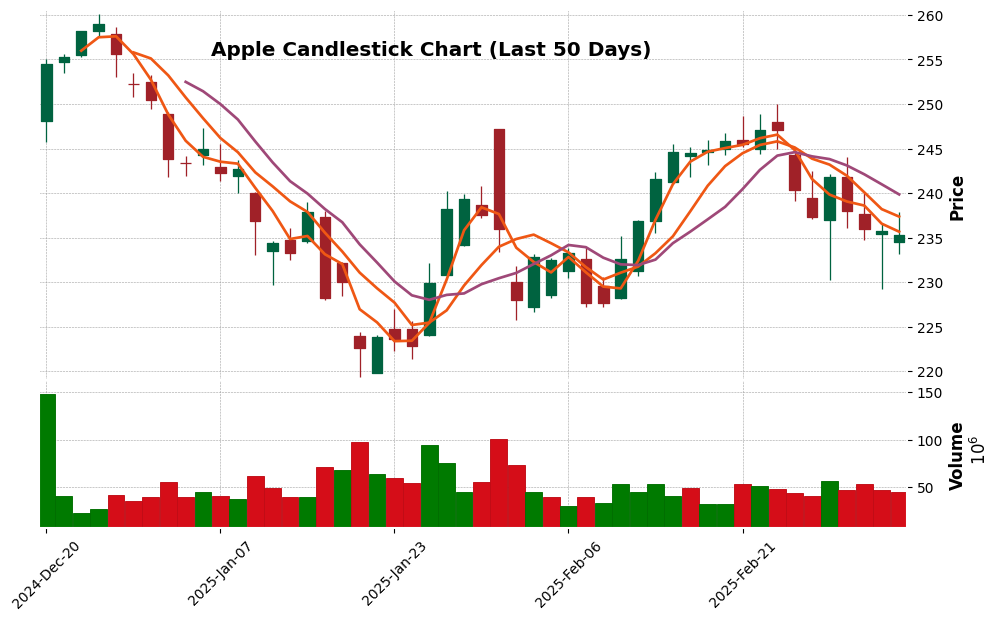

In [13]:
mpf.plot(df.tail(50), 
         type='candle', 
         style='charles', 
         volume=True, 
         title="Apple Candlestick Chart (Last 50 Days)",
         figsize=(10, 6),  # Set the figure size
         ylabel='Price',   # Label for the y-axis
         ylabel_lower='Volume',  # Label for the lower volume subplot
         tight_layout=True,  # Adjust the layout to fit everything nicely
         mav=(3, 6, 9))  # Moving averages (for example, 3, 6, and 9 days)


# Moving Averages (SMA & EMA)

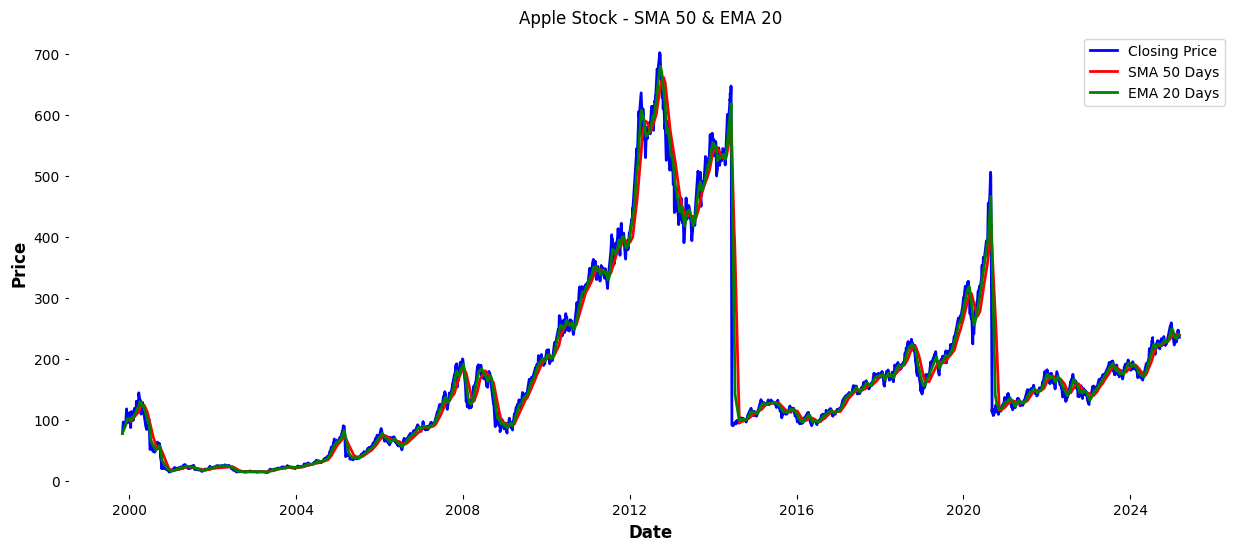

In [5]:
df["SMA_50"] = df["close"].rolling(window=50).mean()
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df["close"], label="Closing Price", color="blue")
plt.plot(df.index, df["SMA_50"], label="SMA 50 Days", color="red")
plt.plot(df.index, df["EMA_20"], label="EMA 20 Days", color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Apple Stock - SMA 50 & EMA 20")
plt.legend()
plt.grid()
plt.show()

#  Trading Volume Bar Chart by Year

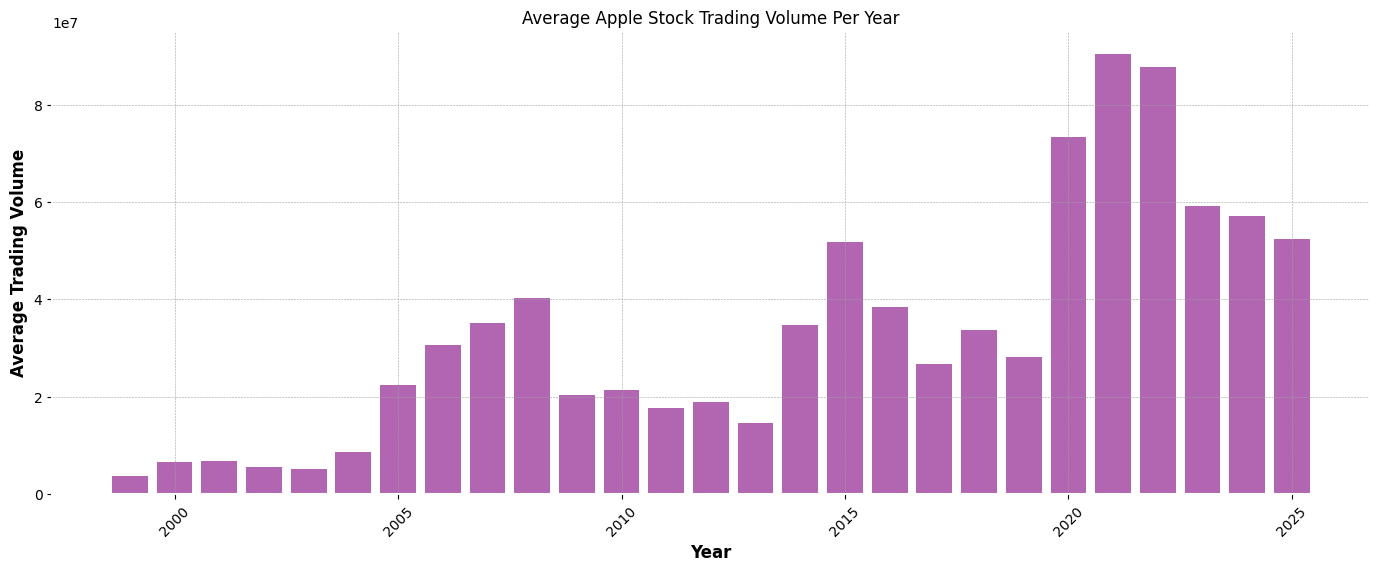

In [ ]:
df['year'] = df.index.year
df_yearly_avg = df.groupby('year')['volume'].mean()

# Plot the data
plt.figure(figsize=(17, 6))
plt.bar(df_yearly_avg.index, df_yearly_avg, color="purple", alpha=0.6)


plt.xlabel("Year")
plt.ylabel("Average Trading Volume")
plt.title("Average Apple Stock Trading Volume Per Year")
plt.xticks(rotation=45)  
plt.show()


# Seasonal Decomposition of Time Series (STL or Decompose)

<Figure size 1700x600 with 0 Axes>

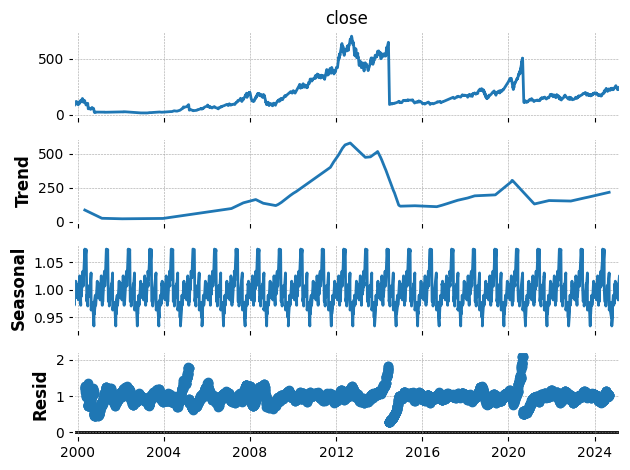

<Figure size 1700x600 with 0 Axes>

In [ ]:
# Seasonal decomposition
result = seasonal_decompose(df['close'], model='multiplicative', period=252)  # Using 252 trading days as the period
plt.figure(figsize=(17, 6))
# Plot decomposition
result.plot()

plt.figure(figsize=(17, 6))
plt.show()

#  Rolling Statistics (Moving Averages & Volatility)

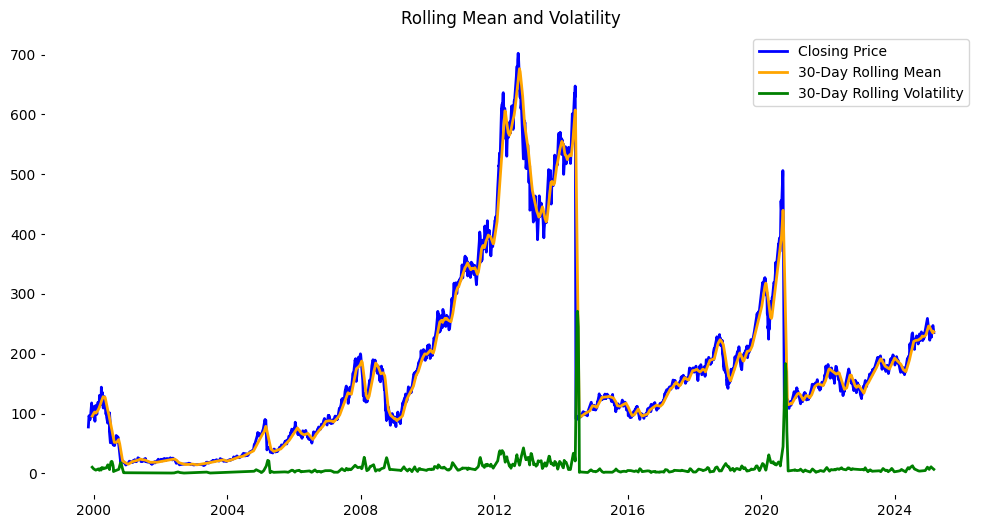

In [ ]:
df['rolling_mean'] = df['close'].rolling(window=30).mean()  # 30-day rolling mean
df['rolling_std'] = df['close'].rolling(window=30).std()  # 30-day rolling standard deviation (volatility)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(df.index, df['rolling_mean'], label='30-Day Rolling Mean', color='orange')
plt.plot(df.index, df['rolling_std'], label='30-Day Rolling Volatility', color='green')
plt.legend()
plt.title("Rolling Mean and Volatility")
plt.grid()
plt.show()


#  Machine Learning: Anomaly Detection

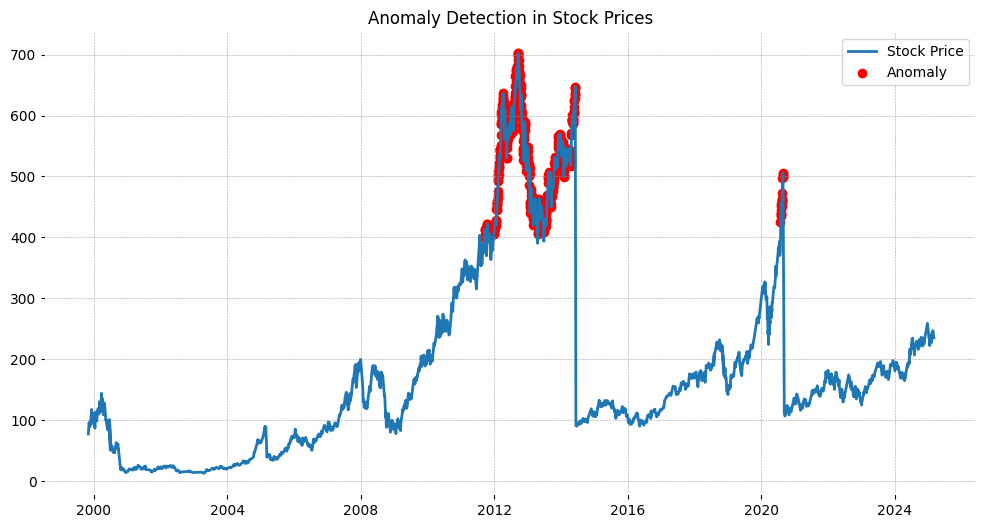

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit an Isolation Forest model
model = IsolationForest(contamination=0.1)  # 10% of the data is considered an anomaly
df['anomaly'] = model.fit_predict(df[['close']])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label="Stock Price")
plt.scatter(df.index[df['anomaly'] == -1], df['close'][df['anomaly'] == -1], color='red', label='Anomaly')
plt.title("Anomaly Detection in Stock Prices")
plt.legend()
plt.show()

# Stacked Area Chart for Stock Prices

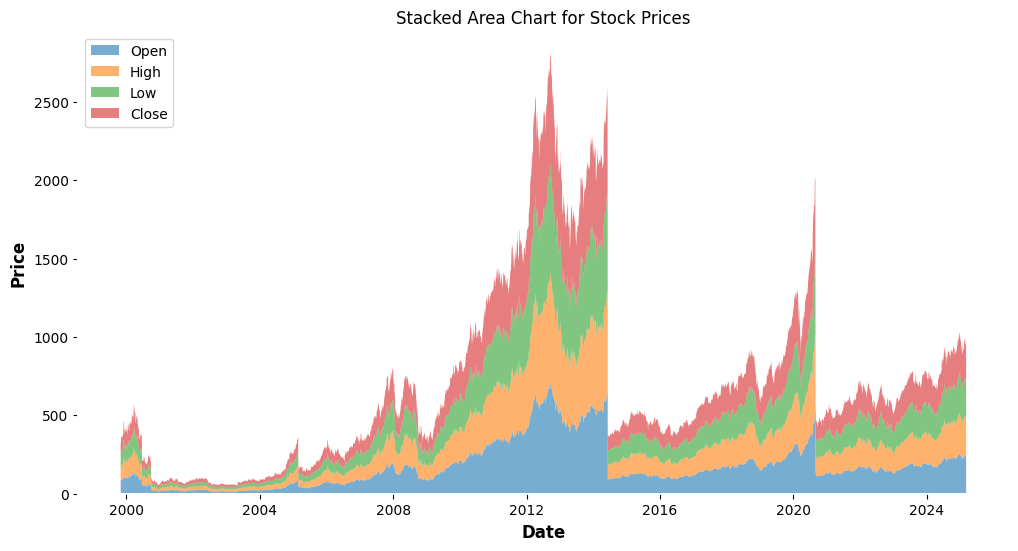

In [ ]:
plt.figure(figsize=(12, 6))
plt.stackplot(df.index, df['open'], df['high'], df['low'], df['close'], labels=["Open", "High", "Low", "Close"], alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stacked Area Chart for Stock Prices")
plt.legend(loc="upper left")
plt.grid()
plt.show()
